"""
Edyta Bartoś, Marcin Grelewicz,
The use of Convolutional Neural Network (CNN) for images classification

based on Tensorflow tutorial:
https://www.tensorflow.org/tutorials/images/cnn
"""

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Dataset: CIFAR10 
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. 
The dataset is divided into 50,000 training images and 10,000 testing images. 
The classes are mutually exclusive and there is no overlap between them.
Animals: frog, dog, cat, horse, and bird correspond to indexes 6, 5, 3, 7, and 2.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

(60000, 32, 32, 3)
(50000, 32, 32, 3)


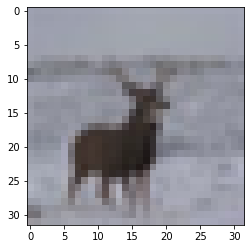

In [4]:
# Concatenate train and test images
X = np.concatenate((train_images, test_images))
y = np.concatenate((train_labels,test_labels))

# Check shape
print(X.shape) # (60000, 32, 32, 3)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=1234)

# Check shape
print(X_train.shape) # (50000, 32, 32, 3)

# View first image
plt.imshow(X_train[0])
plt.show()

In [5]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

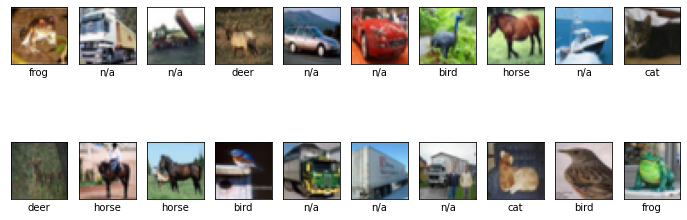

In [10]:
## Ploting the first 25 images from the training set and display the class name below each image
class_names = ['n/a', 'n/a', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'n/a', 'n/a']

plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # hence the extra index below
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [11]:
## defining the convolutional base using a common pattern: 
## a stack of Conv2D and MaxPooling2D layers.
## As input, a CNN takes tensors of shape (image_height, image_width, color_channels), 
## ignoring the batch size

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [12]:
#display the architecture of the model so far
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# The final architecture of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

The (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

In [14]:
#Compile and train the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5579 - accuracy: 0.4296 - val_loss: 1.3038 - val_accuracy: 0.5307
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1963 - accuracy: 0.5754 - val_loss: 1.1416 - val_accuracy: 0.5981
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0472 - accuracy: 0.6313 - val_loss: 1.0203 - val_accuracy: 0.6394
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9490 - accuracy: 0.6676 - val_loss: 0.9587 - val_accuracy: 0.6647
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8785 - accuracy: 0.6917 - val_loss: 0.9217 - val_accuracy: 0.6788
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8252 - accuracy: 0.7116 - val_loss: 0.9048 - val_accuracy: 0.6865
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7824 - accuracy: 0.7263 - val_loss: 0.8675 -

313/313 - 1s - loss: 0.8752 - accuracy: 0.7023


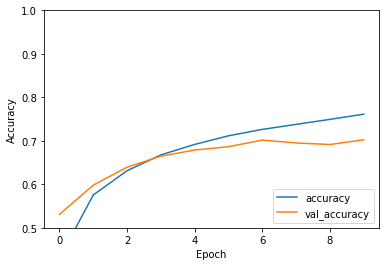

In [15]:
#Evaluate the model

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In [16]:
print(test_acc)

0.7023000121116638


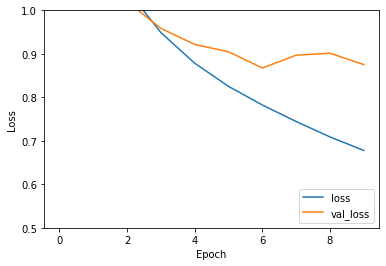

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
model.save('D:/PJATK/EDUX/_7semestr/NAI/models/cifar/', include_optimizer=True)

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.8752 - accuracy: 0.7023

Test accuracy: 0.7023000121116638


In [19]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

In [21]:
predictions[3]

array([6.17942631e-01, 1.23980798e-01, 1.19576221e-02, 2.45168968e-03,
       5.85005211e-04, 1.00247082e-04, 2.96130951e-04, 1.18532495e-04,
       2.39868149e-01, 2.69915885e-03], dtype=float32)

In [22]:
np.argmax(predictions[3])

0

In [23]:
test_labels[0]

array([3], dtype=uint8)

In [24]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(100*np.max(predictions_array),), color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

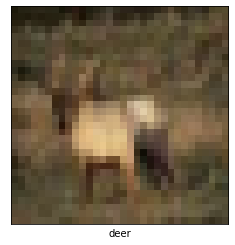

In [25]:
i = 3
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
plt.xlabel(class_names[train_labels[i][0]])

plt.show()